<a href="https://colab.research.google.com/github/mariangelaerik-svg/Evolution/blob/main/StructuredPopulations_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structured population

## Functions

To simplify the simulation code, let's first wrap up the calculation into functions and call them in the loop afterwards.

We will define two functions, one for the WF, and one for the calculation of heterozygosity and Fst for a diploid organism.

### Function for the drift
**Hints:**

- the frequencies of two subpopulations are driven by the drift seperately;
- the mean frequency, that is, the frequency of the total population needs to be calculated (for Fst calculation);
- the size of two subpopulations (N1,N2) may be different.

Assume a bialleleic locus in a population (**allele A and allele a**).
Let **the frequency of A in subpopulation 1** at the parent generation to be **p1**, **the frequency of A in subpopulation 2** at the parent generation to be **p2**. Let **pt1** is the frequency of A in subpopulation 1 at the offspring generation, **pt2** is the frequency of A in subpopulation 2 at the offspring generation. **N1** and **N2** are the subpopulation sizes and **pt_mean** is the frequency of the total population.

In [ ]:
WF <- function(p1, p2, N1, N2){
  # Todo: Fill in the calculation of WF in one generation. hint: rbinom()
  pt1 <-  rbinom(1, (2*N), p1) / (2*N)
  pt2 <- rbinom(1, (2*N), p2) / (2*N)
  pt_mean <- (pt1*N1 + pt2*N2)/ (N1+N2)  # weighted mean

  return(c(pt1, pt2, pt_mean))  # the output is a vector. Later we will store the output for each generation in a matrix
}

### Function for the calculation of heterozygosity and Fst

**We need:**

- $H_1$: heterozygosity of subpop1;
- $H_2$: heterozygosity of subpop2;
- $H_S$: mean heterozygosity of the subpopulations;
- $H_T$: heterozygosity of the total population (expected);
- $F_{ST}$: fixation indice

In [ ]:
# Function for the calculation of heterozygosity and Fst
FST <- function(allele_freq, N1, N2){
  # Assign the elements in 'allele_freq' vector to p1, p2, p_mean, respectively.
  # The values of this vector (allele_freq) will be calculated using the WF function.
  p1 <- allele_freq[1]
  p2 <- allele_freq[2]
  p_mean <- allele_freq[3]

  ## Todo: Fill in the calculation of heterozygosity and Fst for one generation
  # Calculation
  H1 <- 2* p1* (1-p1)          # heterozygosity of subpop1
  H2 <- 2 * p2 * (1 - p2)          # heterozygosity of subpop2
  H_S <- (H1 * N1 + H2 * N2) / (N1 + N2)         # hint: N1 may not equals to N2, calculate the weighted mean
  H_T <- 2 * p_mean * (1 - p_mean)
  F_ST <- (H_T - H_S) / H_T # Corrected F_ST calculation

  return(c(H1, H2, H_S, H_T, F_ST))    # the output is a vector. Later we will store the output for each generation in a matrix
}

## Model

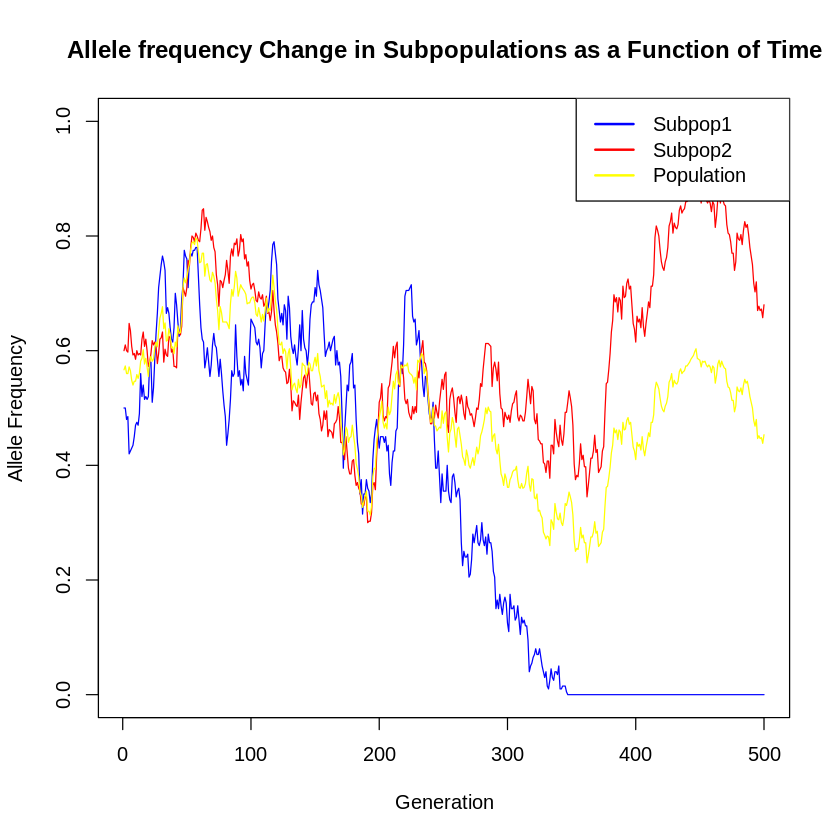

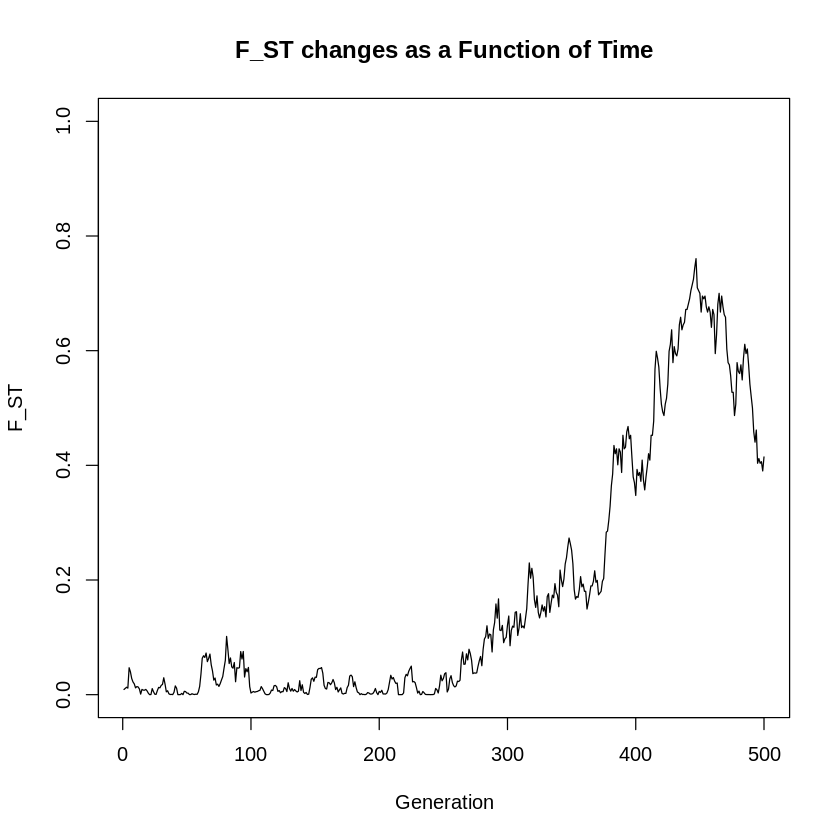

In [ ]:
## Initialization
## Todo: Try different values to test different scenarios
# population size for two subpopulations, repectively
N1 <- 100
N2 <- 200

# number of generations
n_gen <- 500

# initial frequancy (for two subpopulations)
p1 <- 0.5
p2 <- 0.6

#######################################################
# Create two matrices to store the frequencies and the heterozygosities, respectively
freq_pop <- matrix(nrow = n_gen, ncol = 3)   #(1:p1; 2:p2; 3:p_mean)
H_pop <- matrix(nrow = n_gen, ncol = 5)      #(1:H1; 2:H2; 3:H_S; 4:H_T; 5:F_ST)

# Assign the initial allele frequencies and calculate the initial frequency for the total population (p_mean)
freq_pop[1, 1] <- p1
freq_pop[1, 2] <- p2
freq_pop[1, 3] <- (p1 * N1 + p2 * N2) / (N1 + N2)

########################################################
# Todo: call the FST function
# Calculate the heterozygosities for subpop1, subpop2, total_pop, and calculate F_ST (for the first generation)
H_pop[1, ] <- FST(freq_pop[1, ], N1, N2)


########################################################
## Todo: Complete the loop below using the WF and FST function
for (t in 2:n_gen){
  freq_pop[t, ] <- WF(freq_pop[t-1, 1], freq_pop[t-1, 2], N1, N2)
  H_pop[t, ] <- FST(freq_pop[t, ], N1, N2)
}

#########################################################

## plot results
matplot(1:n_gen, freq_pop[ ,1:3], type = "l", lty = 1, ylim = c(0,1), col = c("blue","red", "yellow"),
        xlab = "Generation", ylab = "Allele Frequency",
        main = "Allele frequency Change in Subpopulations as a Function of Time")
legend("topright", legend = c("Subpop1", "Subpop2", "Population"), col = c("blue","red","yellow"), lty = 1, lwd = 2)

# plot F_ST
plot(H_pop[, 5], type = "l", lty = 1, ylim = c(0,1), xlab = "Generation", ylab = "F_ST", main = "F_ST changes as a Function of Time")

In [ ]:
WF <- function(p1, p2, N1, N2){
  # Todo: Fill in the calculation of WF in one generation. hint: rbinom()
  pt1 <-  rbinom(1, (2*N1), p1) / (2*N1)
  pt2 <- rbinom(1, (2*N2), p2) / (2*N2)
  pt_mean <- (pt1*N1 + pt2*N2)/ (N1+N2)  # weighted mean

  return(c(pt1, pt2, pt_mean))  # the output is a vector. Later we will store the output for each generation in a matrix
}

# Migration

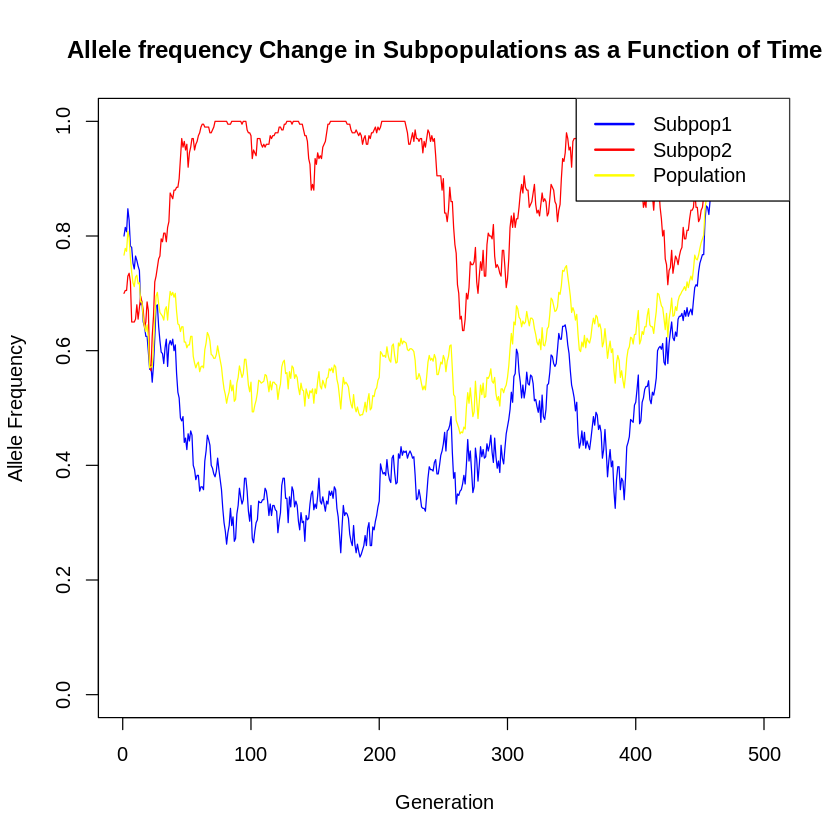

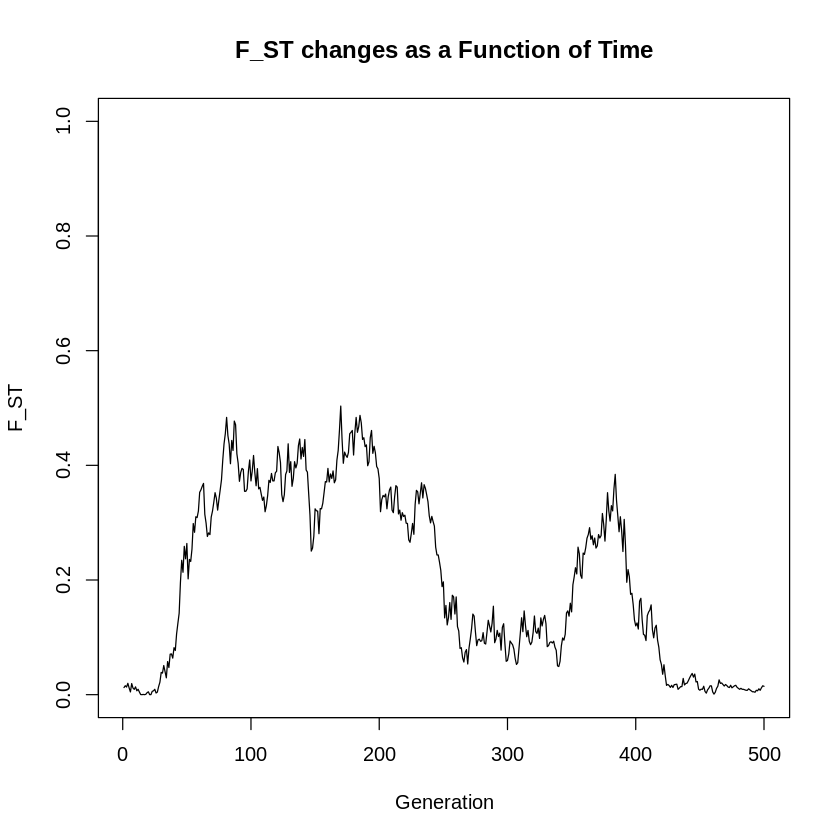

In [ ]:
## Initialization
## Todo: Try different values to test different scenarios
# population size for two subpopulations, repectively
N1 <- 200
N2 <- 100

# number of generations
n_gen <- 500

# initial frequencies of allele A (for two subpopulations)
p1 <- 0.8
p2 <- 0.7

################
## Todo: Modify this value to test different scenarios
# Migration rate
m <- 0.001
###############

#############################################################

# Create two matrices to store the frequencies and the heterozygosities, respectively
freq_pop <- matrix(nrow = n_gen, ncol =3)   #(1:p1; 2:p2; 3:p_mean)
H_pop <- matrix(nrow = n_gen, ncol = 5)      #(1:H1; 2:H2; 3:H_S; 4:H_T; 5:F_ST)

# Assign the initial allele frequencies and calculate the initial frequency for the total population
freq_pop[1, 1] <- p1
freq_pop[1, 2] <- p2
freq_pop[1, 3] <- (p1 * N1 + p2 * N2) / (N1 + N2)

# Calculate the heterozygosities for subpop1, subpop2, total_pop, and calculate F_ST (for the first generation)
H_pop[1, ] <- FST(freq_pop[1, ], N1, N2)


## Todo: Complete the loop below
## Loop
for (t in 2:n_gen){
  ## hint:
  # p1: freq_pop[, 1]
  # p2: freq_pop[, 2]

  # migration
  migrants_to_1 <- freq_pop[t-1, 2]
  migrants_to_2 <- freq_pop[t-1, 1]

  # After migration
  freq1_mig <- (1 - m) * freq_pop[t-1, 1] + m * migrants_to_1
  freq2_mig <- (1 - m) * freq_pop[t-1, 2] + m * migrants_to_2

  # Drift
  # Todo: Complete the loop below using the WF and FST function
  freq_pop[t, ] <- WF(freq1_mig, freq2_mig, N1, N2)
  H_pop[t, ] <- FST(freq_pop[t, ], N1, N2)
}
####################################################

## plot results
matplot(1:n_gen, freq_pop[ ,1:3], type = "l", lty = 1, ylim = c(0,1), col = c("blue","red", "yellow"),
        xlab = "Generation", ylab = "Allele Frequency",
        main = "Allele frequency Change in Subpopulations as a Function of Time")
legend("topright", legend = c("Subpop1", "Subpop2", "Population"), col = c("blue","red","yellow"), lty = 1, lwd = 2)

# plot F_ST
plot(H_pop[, 5], type = "l", lty = 1, ylim = c(0,1), xlab = "Generation", ylab = "F_ST", main = "F_ST changes as a Function of Time")

# Questions

- How does migration affect genetic diversity?
- When the subpopulation sizes are not equivalent, how does the allele frequency in each subpopulation contribute to that in the total population?